# Import software libraries and load the dataset

In [1]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
from numpy.random import seed
import pandas as pd                    # Manipulate and analyze data frames.
import sklearn                         # Perform feature engineering and machine learning.
import tensorflow                      # Train neural networks for deep learning.
import keras                           # Provide a frontend for TensorFlow.
from keras import datasets
import matplotlib                      # Create charts.
import matplotlib.pyplot as plt

# Summarize software libraries used.
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- TensorFlow {}'.format(tensorflow.__version__))
print('- Keras {}'.format(keras.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Python {}\n'.format(sys.version))

# Load the dataset.
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words = 10000)
print('Loaded {} training records.'.format(len(X_train.data)))
print('Loaded {} testing records.'.format(len(X_test.data)))

# Comment the following two lines to make outcomes stochastic, or supply different seed values.
seed(1)
tensorflow.random.set_seed(1)

Libraries used in this project:
- NumPy 1.25.2
- pandas 2.0.3
- scikit-learn 1.2.2
- TensorFlow 2.15.0
- Keras 2.15.0
- Matplotlib 3.7.1
- Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

17464789/17464789 [==============================] - 1s 0us/step
Loaded 25000 training records.
Loaded 25000 testing records.


# Get acquainted with the dataset

In [2]:
print('First example features:\n')
print(X_train[0])
print('\n')
print('Label: {}'.format(y_train[0]))

First example features:

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Label: 1


In [3]:
# Decode sequence values into actual text.
index = datasets.imdb.get_word_index()
index_dict = dict([(value, key) for (key, value) in index.items()])

# Replace unknown words with '?'.
decode = ' '.join([index_dict.get(i - 3, '?') for i in X_train[0]])
decode

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Examine some statistics about the reviews

In [4]:
result = [len(i) for i in X_train]
print('Mean review length (in words): {:.0f}'.format(np.mean(result)))
print('Standard deviation (in words): {:.0f}'.format(np.std(result)))

Mean review length (in words): 239
Standard deviation (in words): 176


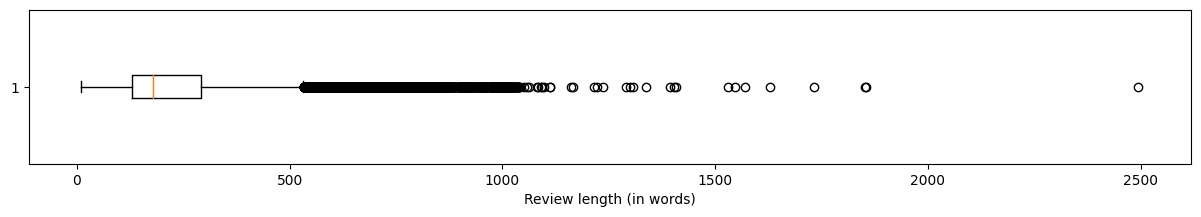

In [5]:
plt.figure(figsize = (15, 2))
plt.boxplot(result, vert = False)
plt.xlabel('Review length (in words)')
plt.show()

# Add padding to the data

In [6]:
from keras.utils import pad_sequences

X_train = pad_sequences(X_train, maxlen = 500)
X_test = pad_sequences(X_test, maxlen = 500)

print('Number of features: {}'.format(X_train.shape[1]))

Number of features: 500


# Split the dataset

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  random_state = 50)

print(f'Training features:   {X_train.shape}')
print(f'Validation features: {X_val.shape}')
print(f'Training labels:     {y_train.shape}')
print(f'Validation labels:   {y_val.shape}')

Training features:   (18750, 500)
Validation features: (6250, 500)
Training labels:     (18750,)
Validation labels:   (6250,)


# Build the RNN structure

In [8]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.layers import LeakyReLU

rnn = Sequential()

# Start stacking layers one by one.
rnn.add(Embedding(input_dim = 10000,  # Size of vocabulary (top 10,000 words).
                  output_dim = 100,  # 100-dimensional vector embedding.
                  input_length = 500))  # Length of review (in words).

rnn.add(LSTM(units = 64))  # 64-dimensional LSTM.
rnn.add(LeakyReLU(alpha = 0.1))

rnn.add(Dense(128, activation = 'linear'))
rnn.add(LeakyReLU(alpha = 0.1))
rnn.add(Dense(1, activation = 'sigmoid'))  # Dense output layer with sigmoid activation.

print('The RNN structure has been built.')

The RNN structure has been built.


# Compile the model and examine the layers

In [9]:
rnn.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1050689 (4.01 MB)
Trainable params: 105068

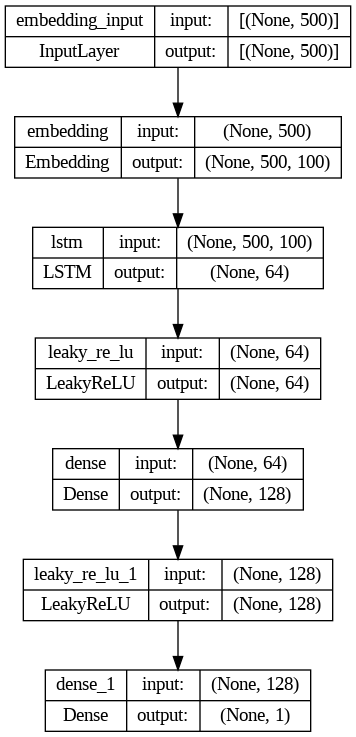

In [10]:
from keras.utils import plot_model
plot_model(rnn, show_shapes = True)

# Train the model

In [11]:
rnn_trained = rnn.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 1,
                      verbose = 1)

586/586 [==============================] - 215s 361ms/step - loss: 0.4511 - accuracy: 0.7859 - val_loss: 0.3489 - val_accuracy: 0.8590


# Evaluate the model on the test data

In [12]:
eval_test = rnn.evaluate(X_test, y_test, verbose = 0)

print('Loss: {}'.format(round(eval_test[0], 2)))
print('Accuracy: {:.0f}%'.format(eval_test[1] * 100))

Loss: 0.35
Accuracy: 86%


# Make predictions on the test data

In [13]:
prediction = rnn.predict(X_test[:100])  # Predict first 100 examples to save time.
prediction = np.round(np.ndarray.flatten(prediction))  # Round probabilities to 0 or 1.
prediction = prediction.astype(int)

print('Actual class:    {}'.format(y_test[:10]))
print('Predicted class: {}'.format(prediction[:10]))

4/4 [==============================] - 1s 51ms/step
Actual class:    [0 1 1 0 1 1 1 0 0 1]
Predicted class: [0 1 1 0 1 1 1 0 1 1]


# Examine a review that was correctly classified

In [14]:
label_names = ['negative', 'positive']

for i in range(100):
    if y_test[i] == prediction[i]:
        print('Actual review sentiment:    {}'.format(label_names[y_test[i]]))
        print('Predicted review sentiment: {}\n'.format(label_names[prediction[i]]))

        # Decode text for printing.
        decode = ' '.join([index_dict.get(x - 3, '?') for x in X_test[i]])

        print(decode)

        break

Actual review sentiment:    negative
Predicted review sentiment: negative

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the c

# Examine a review that was incorrectly classified

In [15]:
for i in range(100):
    if y_test[i] != prediction[i]:
        print('Actual review sentiment:    {}'.format(label_names[y_test[i]]))
        print('Predicted review sentiment: {}\n'.format(label_names[prediction[i]]))

        # Decode text for printing.
        decode = ' '.join([index_dict.get(x - 3, '?') for x in X_test[i]])

        print(decode)

        break

Actual review sentiment:    negative
Predicted review sentiment: positive

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? hollywood had a long love affair with bogus ? nights tales but few of these products have stood the test of time the most memorable were the jon hall maria ? films which have long since becom